#HITO 2

##Función: Graficar grafo

In [49]:
import graphviz as gv
import numpy as np
import pandas as pd

def adjlShow(L, lenn, LAmacen, LPuntosEntrega, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    colors ="gray"
    for almacen in LAmacen:
      if u == almacen[0]+almacen[1]*lenn:
        colors ="red"
    for pEntrega in LPuntosEntrega:
      if u == pEntrega[0]+pEntrega[1]*lenn:
        colors ="blue"
    g.node(str(u), labels[u] if labels else str(u), color = colors)
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

##Función: Crear lista de adyacencia

In [50]:
def createAdjacencyList(cuadras):
  lenn = cuadras+1
  L = [[] for _ in range(lenn**2)]
  for x in range(0,lenn):
    for y in range(0,lenn):
      if x == 0:
        if y == 0:
          nodo = x + y*lenn
          L[nodo].append(1)
          L[nodo].append(lenn)
        elif y == lenn-1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo + 1)
        else:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo + 1)
          L[nodo].append(nodo + lenn)
      if y == 0:
        if x == lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + lenn)
        elif x!=0 and x < lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + 1)
          L[nodo].append(nodo + lenn)
      if y == lenn - 1:
        if x != 0 and x < lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + 1)
        elif x == lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo - 1)
      
      if x == lenn - 1:
        if y != 0 and y < lenn - 1:
          nodo = x + y*lenn
          L[nodo].append(nodo - lenn)
          L[nodo].append(nodo - 1)
          L[nodo].append(nodo + lenn)

      if x > 0 and y > 0 and x < lenn - 1 and y < lenn - 1:
        nodo = x + y*lenn
        L[nodo].append(nodo - lenn)
        L[nodo].append(nodo - 1)
        L[nodo].append(nodo + 1)
        L[nodo].append(nodo + lenn)
  return L

##Función: Leer archivos .csv

In [51]:
import csv

#Archivos .csv para una ciudad 1000 x 1000 cuadras
#almacenes.csv -> 50 a 100 almacenes
#puntos_entrega.csv ->  2500 a 5000 puntos de entrega
!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/almacenes.csv -P datasets/
!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/puntos_entrega.csv -P datasets/

#Archivos .csv para una ciudad 6 x 6 cuadras
#ejemplo_almacenes.csv -> 7 almacenes
#ejemplo_puntos_entrega.csv -> 19 puntos de entrega
!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/ejemplo_almacenes.csv -P datasets/
!wget https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/ejemplo_puntos_entrega.csv -P datasets/

def loadFile(fileName):
  data = []
  with open(fileName, newline='') as File:  
      reader = csv.reader(File)
      for row in reader:
          rowInfo = []
          for num in row:
            rowInfo.append(int(num))
          data.append(rowInfo)
      return data

almacenes = loadFile('datasets/almacenes.csv')
puntosEntrega = loadFile('datasets/puntos_entrega.csv')
print(almacenes)
print(puntosEntrega)

ejemploAlmacenes = loadFile('datasets/ejemplo_almacenes.csv')
ejemploPuntosEntrega = loadFile('datasets/ejemplo_puntos_entrega.csv')
print(ejemploAlmacenes)
print(ejemploPuntosEntrega)

--2021-10-29 12:33:01--  https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/almacenes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512 [text/plain]
Saving to: ‘datasets/almacenes.csv.1’

almacenes.csv.1     100%[===================>]     512  --.-KB/s    in 0s      

2021-10-29 12:33:01 (21.7 MB/s) - ‘datasets/almacenes.csv.1’ saved [512/512]

--2021-10-29 12:33:01--  https://raw.githubusercontent.com/lmsupc/wv71_tf_201617515_201816689/main/datasets/puntos_entrega.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

##Función: BFS

In [52]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        parent[v] = u
        queue.append(v)

  return parent

##Ciudad 1000 x 1000 cuadras

In [ ]:
cuadras = 1000
L = createAdjacencyList(cuadras)
lenn = cuadras + 1

#Implementar algoritmo bfs al grafo generado
path = bfs(L,0)
print(f"Path:{path}")

#Implementar bfs desde cada almacen a todos los puntos de entrega
LAlmacenes = []
LPuntosEntrega = []
for a in almacenes:
  LAlmacenes.append(a[0]+a[1]*(lenn))
for p in puntosEntrega:
  LPuntosEntrega.append(p[0]+p[1]*(lenn))

#Path de cada almacen hasta todos los puntos de entrega
for node in LAlmacenes:
  path = bfs(L,node)
  almacenPath = [None]*((lenn)**2)

  for p in LPuntosEntrega:
    while path[p] != node:
      almacenPath[p] = path[p]
      p = path[p]
    if path[p] == node:
      almacenPath[p] = path[p]

  print(f"Path:{almacenPath}")

##Ejemplo: Ciudad 6 x 6 cuadras

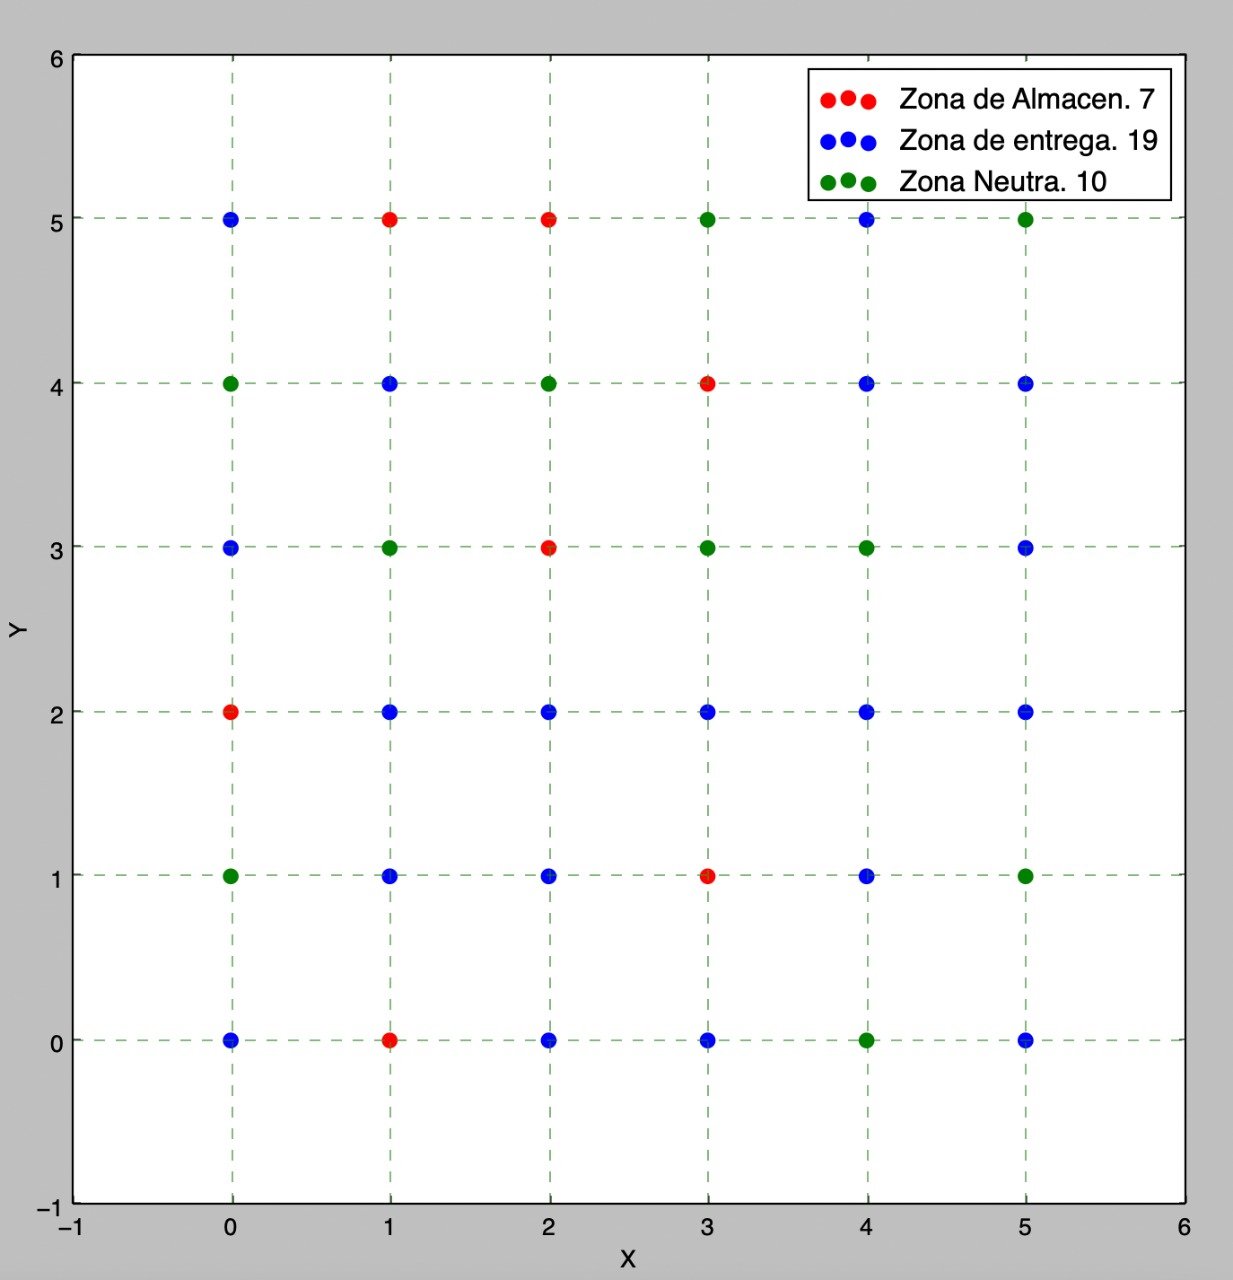

Lista de adyacencia: [[1, 7], [0, 2, 8], [1, 3, 9], [2, 4, 10], [3, 5, 11], [4, 6, 12], [5, 13], [0, 8, 14], [1, 7, 9, 15], [2, 8, 10, 16], [3, 9, 11, 17], [4, 10, 12, 18], [5, 11, 13, 19], [6, 12, 20], [7, 15, 21], [8, 14, 16, 22], [9, 15, 17, 23], [10, 16, 18, 24], [11, 17, 19, 25], [12, 18, 20, 26], [13, 19, 27], [14, 22, 28], [15, 21, 23, 29], [16, 22, 24, 30], [17, 23, 25, 31], [18, 24, 26, 32], [19, 25, 27, 33], [20, 26, 34], [21, 29, 35], [22, 28, 30, 36], [23, 29, 31, 37], [24, 30, 32, 38], [25, 31, 33, 39], [26, 32, 34, 40], [27, 33, 41], [28, 36, 42], [29, 35, 37, 43], [30, 36, 38, 44], [31, 37, 39, 45], [32, 38, 40, 46], [33, 39, 41, 47], [34, 40, 48], [35, 43], [36, 42, 44], [37, 43, 45], [38, 44, 46], [39, 45, 47], [40, 46, 48], [41, 47]]
Path:[None, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Almacenes(rojo): 7
Puntos de entrega(azul): 19


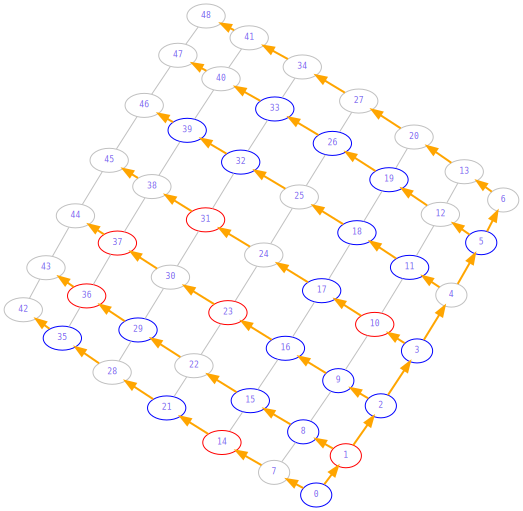

In [57]:
cuadras = 6
L = createAdjacencyList(cuadras)
print(f"Lista de adyacencia: {L}")
lenn = cuadras + 1

LEjemploAlmacenes = []
LEjemploPuntosEntrega = []
for a in ejemploAlmacenes:
  LEjemploAlmacenes.append(a[0]+a[1]*(lenn))
for p in ejemploPuntosEntrega:
  LEjemploPuntosEntrega.append(p[0]+p[1]*(lenn))

path = bfs(L,0)
print(f"Path:{path}")
print(f"Almacenes(rojo): {len(ejemploAlmacenes)}")
print(f"Puntos de entrega(azul): {len(ejemploPuntosEntrega)}")
adjlShow(L, lenn, ejemploAlmacenes, ejemploPuntosEntrega, path = path)

**Ejemplo con el primer almacen**

Path:[7, 0, 1, 2, 3, 4, None, 14, 7, 8, 9, 10, None, None, None, 14, 15, 16, 17, 18, None, 14, 15, None, None, 18, 19, None, 21, 22, None, None, 25, 26, None, 28, None, None, None, 32, None, None, None, None, None, None, None, None, None]
Almacenes(rojo): 7
Puntos de entrega(azul): 19
BFS del almacen ubicado en (0;2) representado por el nodo 14 hasta todos los puntos de entrega


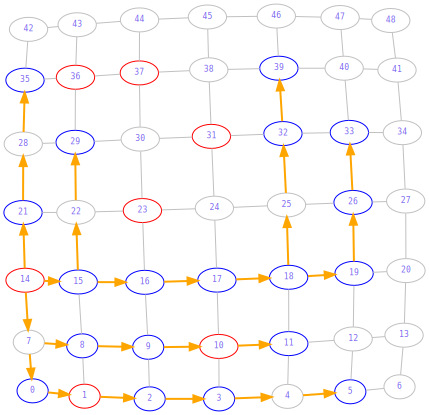

In [58]:
node = LEjemploAlmacenes[0]
path = bfs(L,node)
almacenPath = [None]*((lenn)**2)

for p in LEjemploPuntosEntrega:
  while path[p] != node:
    almacenPath[p] = path[p]
    p = path[p]
  if path[p] == node:
    almacenPath[p] = path[p]

print(f"Path:{almacenPath}")
print(f"Almacenes(rojo): {len(ejemploAlmacenes)}")
print(f"Puntos de entrega(azul): {len(ejemploPuntosEntrega)}")
almacen = ejemploAlmacenes[0]
print(f"BFS del almacen ubicado en ({almacen[0]};{almacen[1]}) representado por el nodo {node} hasta todos los puntos de entrega")
adjlShow(L, lenn, ejemploAlmacenes, ejemploPuntosEntrega, path = almacenPath)

**Ejemplo con el segundo almacen**

Path:[1, None, 1, 2, 3, 4, None, 0, 1, 2, 3, 4, 5, None, 7, 8, 9, 10, 11, 12, None, 14, 15, None, None, 18, 19, None, 21, 22, None, None, 25, 26, None, 28, None, None, None, 32, None, None, None, None, None, None, None, None, None]
Almacenes(rojo): 7
Puntos de entrega(azul): 19
BFS del almacen ubicado en (1;0) representado por el nodo 1 hasta todos los puntos de entrega


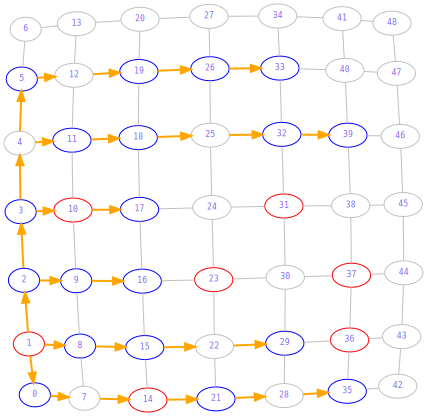

In [59]:
node = LEjemploAlmacenes[1]
path = bfs(L,node)
almacenPath = [None]*((lenn)**2)

for p in LEjemploPuntosEntrega:
  while path[p] != node:
    almacenPath[p] = path[p]
    p = path[p]
  if path[p] == node:
    almacenPath[p] = path[p]

print(f"Path:{almacenPath}")
print(f"Almacenes(rojo): {len(ejemploAlmacenes)}")
print(f"Puntos de entrega(azul): {len(ejemploPuntosEntrega)}")
almacen = ejemploAlmacenes[1]
print(f"BFS del almacen ubicado en ({almacen[0]};{almacen[1]}) representado por el nodo {node} hasta todos los puntos de entrega")
adjlShow(L, lenn, ejemploAlmacenes, ejemploPuntosEntrega, path = almacenPath)